In [12]:
#Imports
#! pip install mne
import mne
import matplotlib.pyplot as plt
%matplotlib inline

# Reading EDF file

In [3]:
raw_signal = mne.io.read_raw_edf(r'physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN001.edf', preload=True)
#print(raw_signal.info)
channel_names = raw_signal.ch_names
print("Channels:", channel_names)

Extracting EDF parameters from c:\Users\lewin\OneDrive\Desktop\College Semesters\Sleep Stage Classification\physionet.org\files\hmc-sleep-staging\1.0.0\recordings\SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6566399  =      0.000 ... 25649.996 secs...


C:\Users\lewin\AppData\Local\Temp\ipykernel_43344\2989165392.py:1: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_signal = mne.io.read_raw_edf(r'physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN001.edf', preload=True)
C:\Users\lewin\AppData\Local\Temp\ipykernel_43344\2989165392.py:1: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_signal = mne.io.read_raw_edf(r'physionet.org/files/hmc-sleep-staging/1.0.0/recordings/SN001.edf', preload=True)


Channels: ['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2', 'EMG chin', 'EOG E1-M2', 'EOG E2-M2', 'ECG']


In [1]:
raw_signal.plot(duration=100, title=" EEG Graph");

NameError: name 'raw_signal' is not defined

# Plotting EEG C4-M1

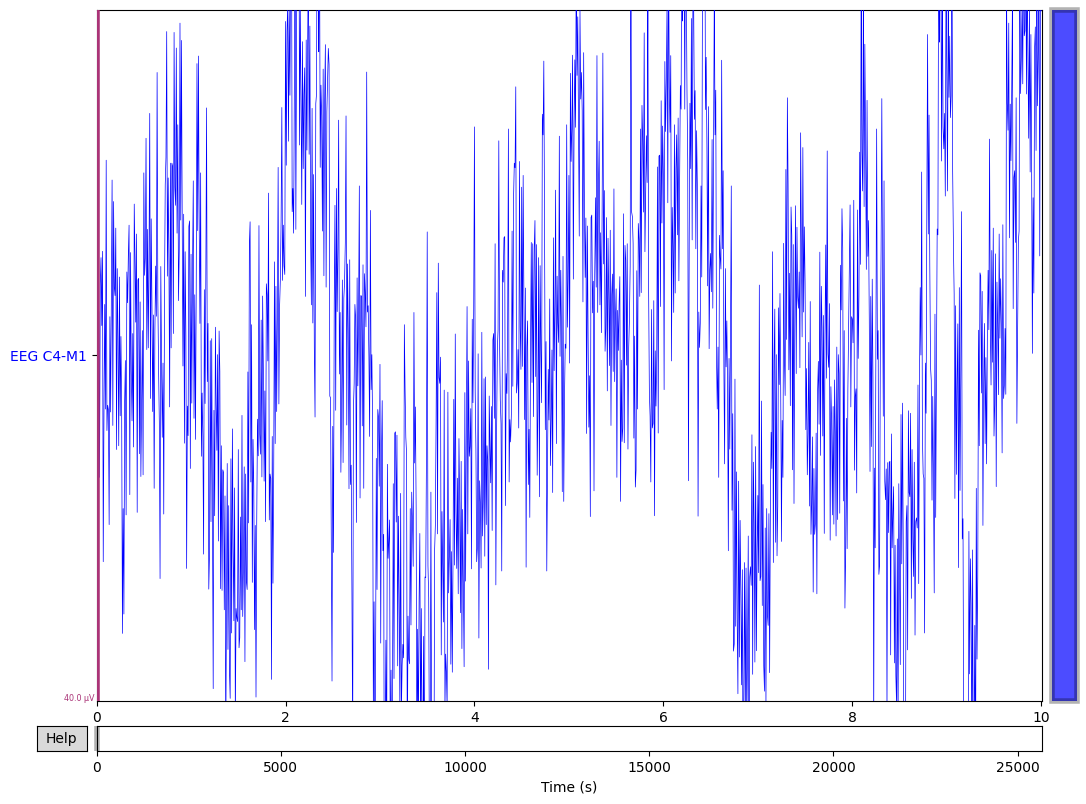

In [6]:
# raw_signal.plot(duration=1, order=[1], title=" EEG Graph");
raw_signal.plot(order=[1], title=" EEG Graph", color='blue');

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
<RawEDF | SN001.edf, 1 x 6566400 (25650.0 s), ~50.1 MB, data loaded>


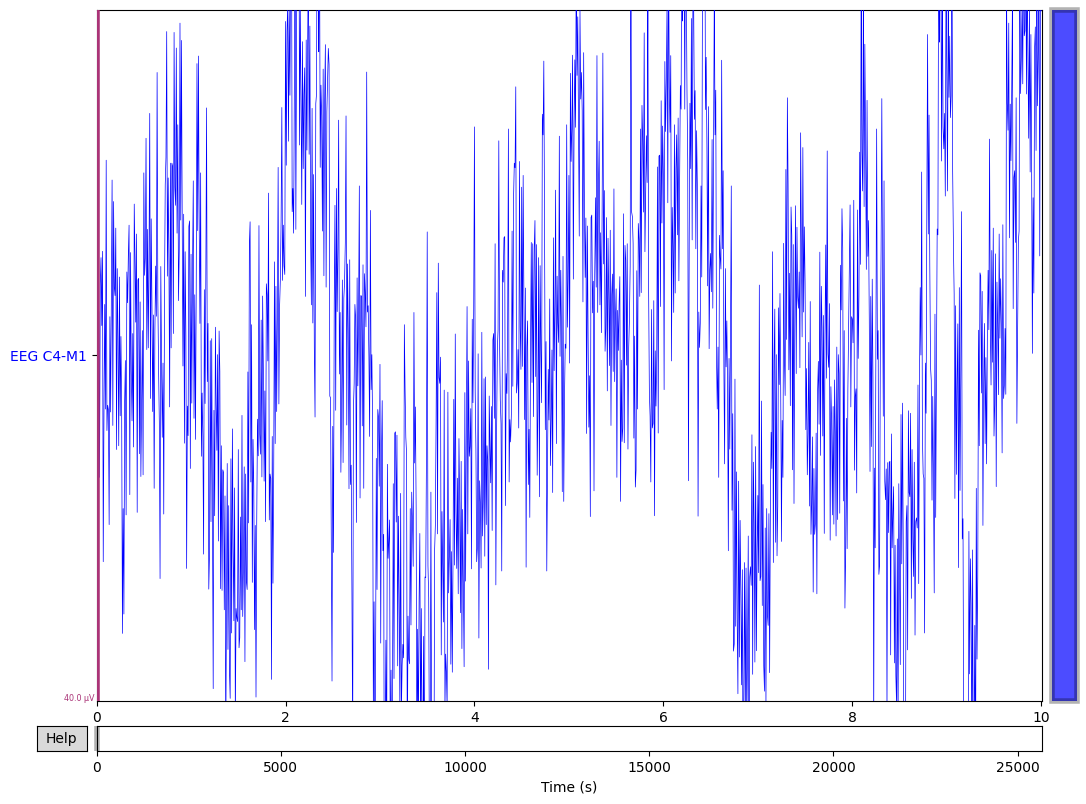

In [17]:
eeg_m1 = raw_signal.copy().pick_channels(['EEG C4-M1'])
print(eeg_m1)
#Plotting 10 seconds
eeg_m1.plot(duration=10, title="EEG C4-M1 Graph", color='blue');


# Frequency bands

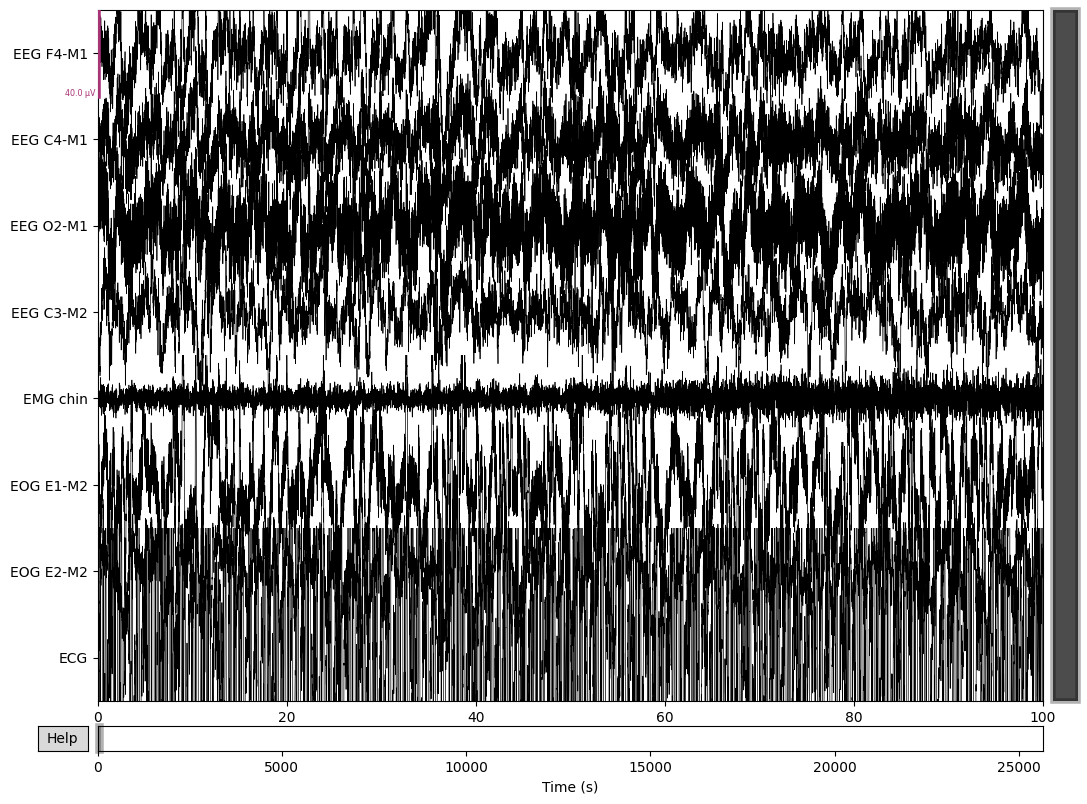

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 s)



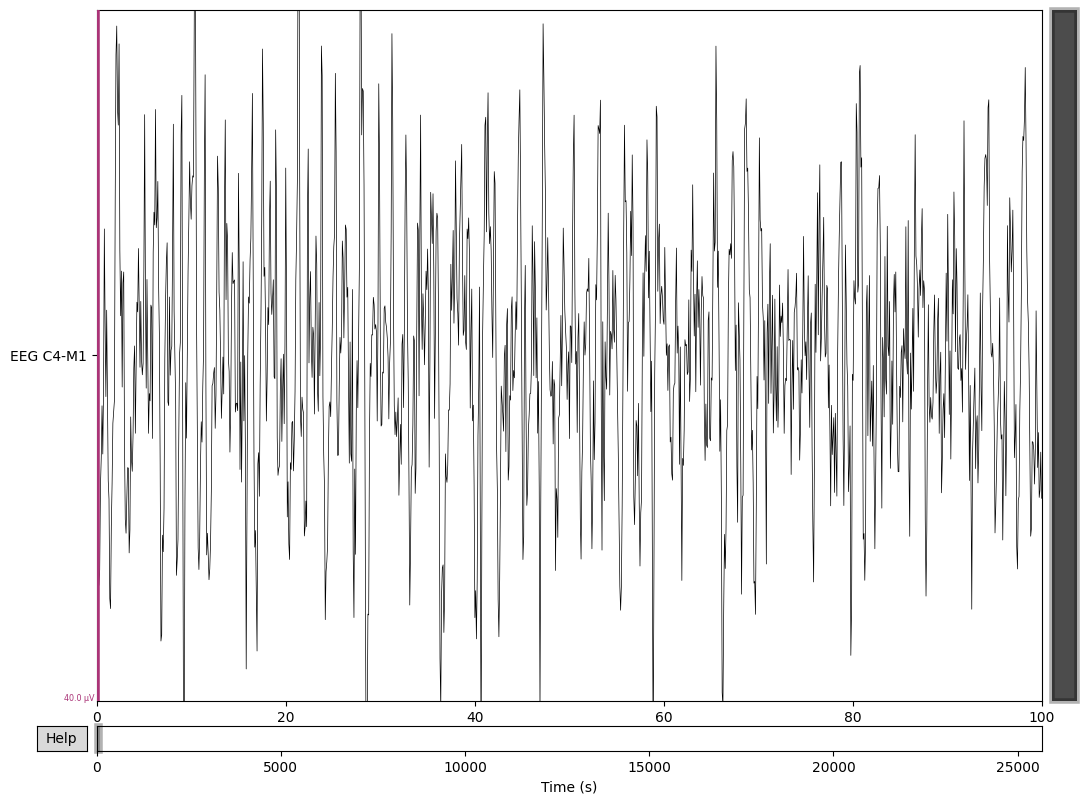

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 9.00 Hz)
- Filter length: 423 samples (1.652 s)



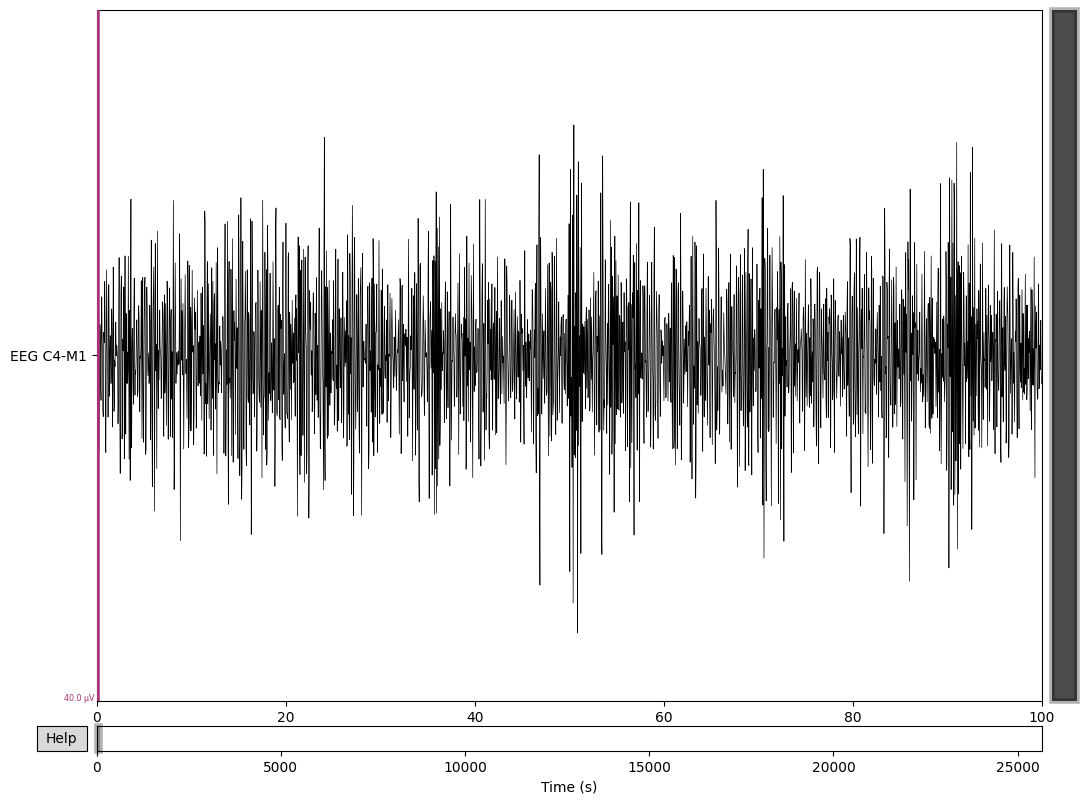

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 13 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 13.00 Hz
- Upper transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 14.62 Hz)
- Filter length: 423 samples (1.652 s)



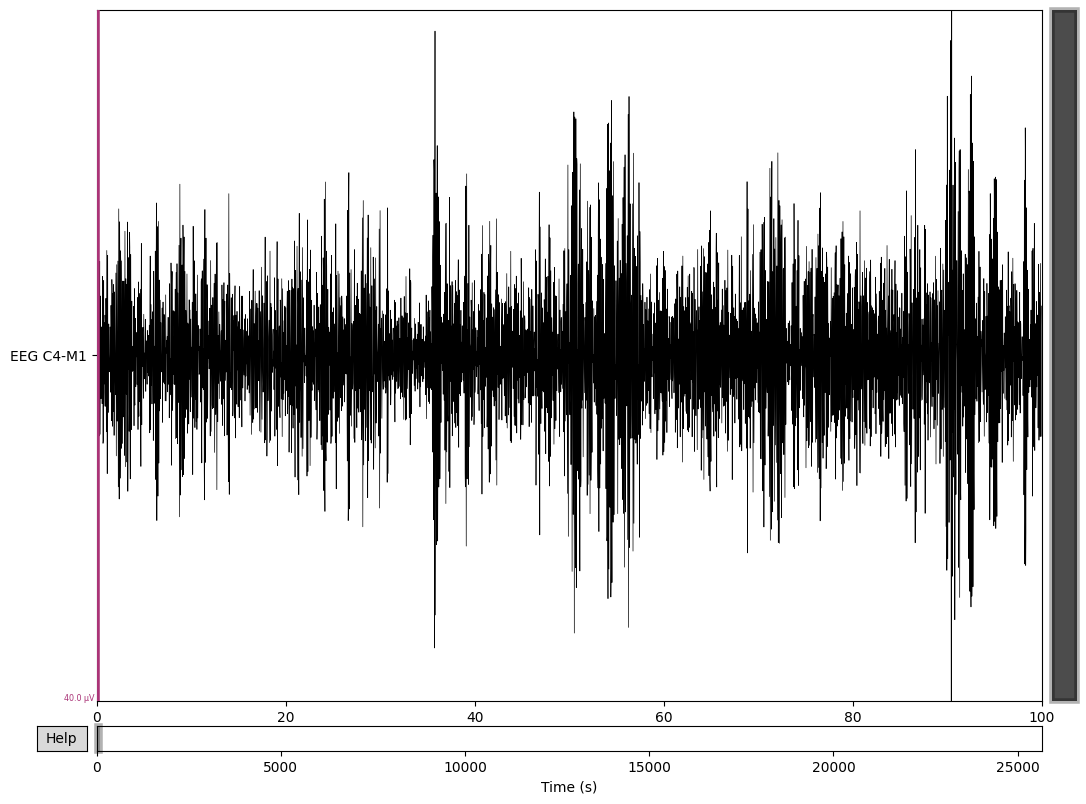

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 13 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 261 samples (1.020 s)



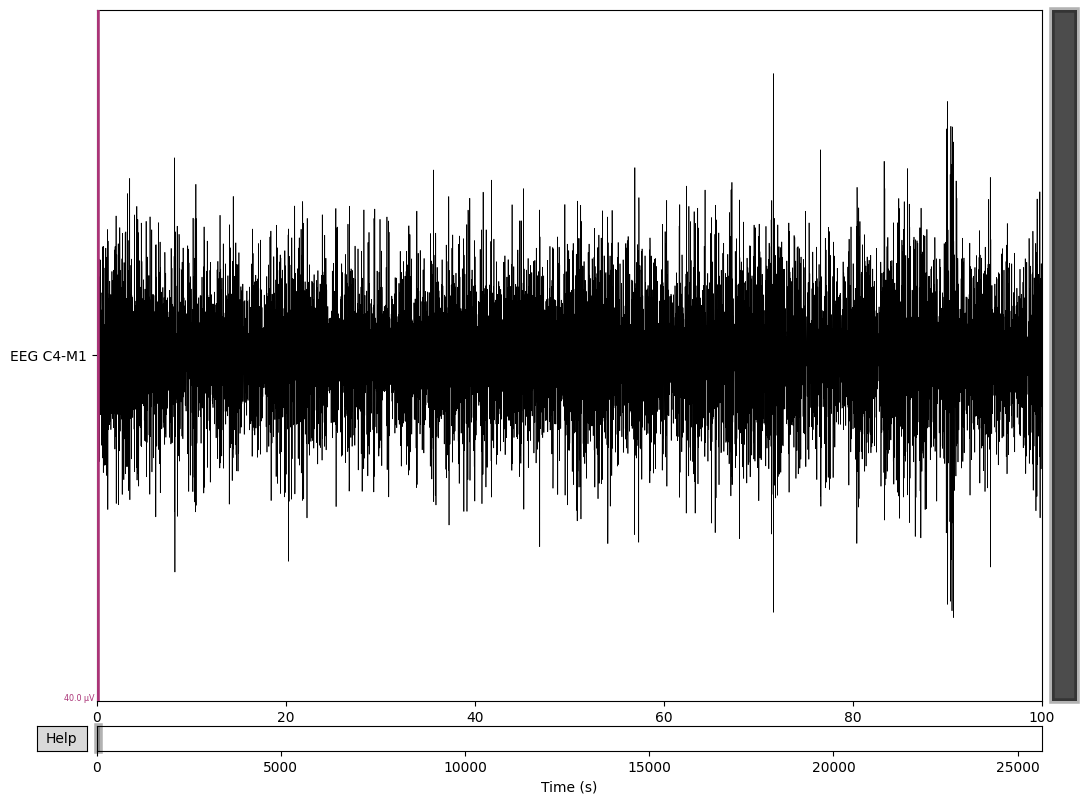

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 113 samples (0.441 s)



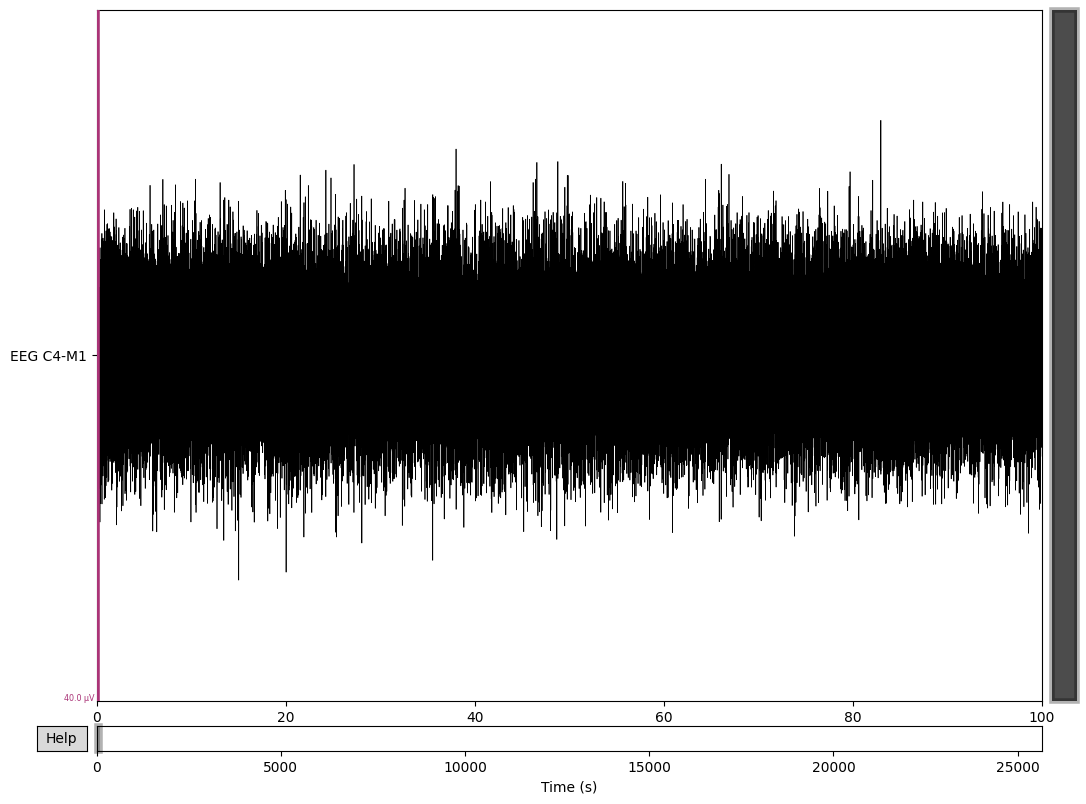

In [18]:
raw_signal.plot(duration=100, title="Original EEG Signal");
eeg_m1 = raw_signal.copy().pick_channels(['EEG C4-M1'])
delta_band = eeg_m1.copy().filter(0.5, 4, fir_design='firwin')
delta_band.plot(duration=100, title="Delta Band (0.5-4 Hz)");
theta_band = eeg_m1.copy().filter(4, 8, fir_design='firwin')
theta_band.plot(duration=100, title="Theta Band (4-8 Hz)");

alpha_band = eeg_m1.copy().filter(8, 13, fir_design='firwin')
alpha_band.plot(duration=100, title="Alpha Band (8-13 Hz)");

beta_band = eeg_m1.copy().filter(13, 30, fir_design='firwin')
beta_band.plot(duration=100, title="Beta Band (13-30 Hz)");

gamma_band = eeg_m1.copy().filter(30, 100, fir_design='firwin')
gamma_band.plot(duration=100, title="Gamma Band (30-100 Hz)");

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition

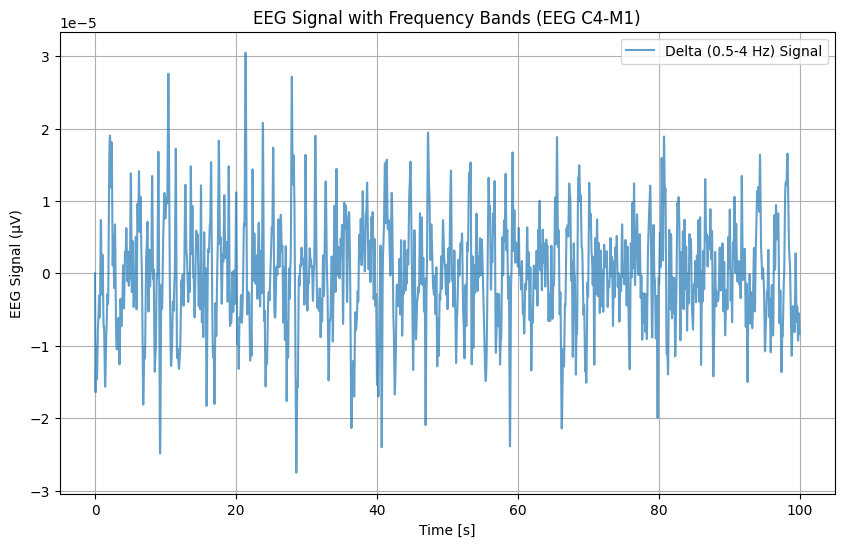

In [20]:
#Checking

# Pick a specific EEG channel (e.g., 'EEG C4-M1')
eeg_m1 = raw_signal.copy().pick_channels(['EEG C4-M1'])

# Delta Band: 0.5–4 Hz
delta_band = eeg_m1.copy().filter(0.5, 4, fir_design='firwin')

# Theta Band: 4–8 Hz
theta_band = eeg_m1.copy().filter(4, 8, fir_design='firwin')

# Alpha Band: 8–13 Hz
alpha_band = eeg_m1.copy().filter(8, 13, fir_design='firwin')

# Beta Band: 13–30 Hz
beta_band = eeg_m1.copy().filter(13, 30, fir_design='firwin')

# Plot all in one graph
plt.figure(figsize=(10, 6))

# Get data for each band
times = eeg_m1.times[:int(100 * eeg_m1.info['sfreq'])]  # First 10 seconds

# Original signal
#plt.plot(times, eeg_m1.get_data()[0][:len(times)], label='Original Signal (EEG C4-M1)', alpha=0.7)

# Delta band
plt.plot(times, delta_band.get_data()[0][:len(times)], label='Delta (0.5-4 Hz) Signal', alpha=0.7)

# Theta band
# plt.plot(times, theta_band.get_data()[0][:len(times)], label='Theta (4-8 Hz) Signal', alpha=0.7)

# # Alpha band
# plt.plot(times, alpha_band.get_data()[0][:len(times)], label='Alpha (8-12 Hz) Signal', alpha=0.7)

# # Beta band
# plt.plot(times, beta_band.get_data()[0][:len(times)], label='Beta (12-30 Hz) Signal', alpha=0.7)

# Adding title and labels
plt.title('EEG Signal with Frequency Bands (EEG C4-M1)')
plt.xlabel('Time [s]')
plt.ylabel('EEG Signal (µV)')

# Show legend
plt.legend(loc='upper right')

# Show grid
plt.grid(True)

# Show plot
plt.show()